In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from google.cloud import bigquery
from bq_helper import BigQueryHelper
import os

In [2]:
commit_df = pd.read_csv('bigproj_commits.csv')

In [3]:
def remove_unnamed_cols(df):
    unnamed_cols = [col for col in df.columns if col.find('Unnamed') != -1]
    return df.drop(unnamed_cols, 1)

In [4]:
commit_df = remove_unnamed_cols(commit_df)
commit_df['proj_created_at'] = pd.to_datetime(commit_df['proj_created_at'])
commit_df['updated_at'] = pd.to_datetime(commit_df['updated_at'])
commit_df['commit_created_at'] = pd.to_datetime(commit_df['commit_created_at'])
commit_df.head()

id name  owner_id    language     proj_created_at  \
0  32620326   px   9369732  JavaScript 2015-09-24 17:19:14   
1  32620326   px   9369732  JavaScript 2015-09-24 17:19:14   
2  32620326   px   9369732  JavaScript 2015-09-24 17:19:14   
3  32620326   px   9369732  JavaScript 2015-09-24 17:19:14   
4  32620326   px   9369732  JavaScript 2015-09-24 17:19:14   

           updated_at  commit_author_id  committer_id   commit_created_at  
0 1970-01-01 01:00:01           3998754       3998754 2016-08-30 03:42:58  
1 1970-01-01 01:00:01           4736043       4736043 2016-02-23 18:36:37  
2 1970-01-01 01:00:01           3045708       3045708 2017-07-10 17:47:40  
3 1970-01-01 01:00:01           3045708       3045708 2017-04-25 20:33:10  
4 1970-01-01 01:00:01            273572        273572 2016-06-23 23:41:47

In [5]:
commit_df['commit_created_at'] = pd.to_datetime(commit_df['commit_created_at'])
mask = commit_df['commit_created_at'] >= '2018-04-01'

In [6]:
c18_df = commit_df[mask]
print(c18_df.shape)
c18_df.head()

(0, 9)


Empty DataFrame
Columns: [id, name, owner_id, language, proj_created_at, updated_at, commit_author_id, committer_id, commit_created_at]
Index: []

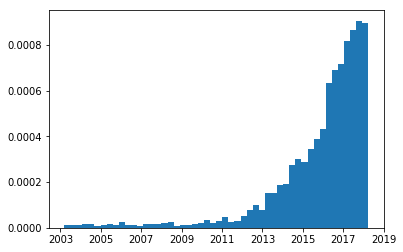

In [6]:
num_bins = 50
fig, ax = plt.subplots()
commit_df['commit_created_at'].dtype
x = commit_df['commit_created_at'].values
n, bins, patches = ax.hist(x, num_bins, density=1)

In [19]:
pgrouped_commits = commit_df.groupby(['id']).agg(['count'])
pgrouped_commits = pgrouped_commits.drop(columns=pgrouped_commits.columns[1:])
pgrouped_commits.head()

name
     count
id        
1041  1632
1182  3544
2539    98
3182   608
3404   207

In [21]:
reset_commits = pgrouped_commits.reset_index(['id'])
reset_commits.head()

id  name
        count
0  1041  1632
1  1182  3544
2  2539    98
3  3182   608
4  3404   207

In [26]:
proj_commit_counts = reset_commits.sort_values(by=[('name','count')], ascending=False)
proj_commit_counts.head(20)

id    name
                count
5        5520  236664
504  37347586   18869
278  11487398    9971
414  32551940    8618
138   8971331    4899
505  48605934    4778
56     161254    3694
1        1182    3544
9       12392    2324
140   9673362    2067
230  10779612    2045
136   5217073    2019
93     981807    1961
182  10195991    1892
135   3604984    1811
0        1041    1632
8       10441    1576
28     120322    1430
160   9966563    1217
66     230938    1096

In [ ]:
azure_SDK_id = 8971331